# Lab 05 - Part 1

### Sudarsan Haridas

### 300353099

**LOAD THE PYTHON LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

from kneed import KneeLocator
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#import and load the necessary libraries...

**READ THE DATA**

In [2]:
df = pd.read_csv('Lab5_wholesome_customer_data.csv')

df_copy = df.copy()

#reading the data and creating a copy of the original...

In [3]:
df.head()

#peeking into the data...

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


**DROP UNNEEDED DATA**

In [4]:
df.info()

#To check data type and number of null values in each column..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


There are **no null** values...

**ELBOW METHOD**

Elbow Method is used to determine the optimal number of clusters...

In [5]:
def SumOfSquares(df):
    
    error_scores = []
    
    for i in range(2,10):
        km_model = KMeans(n_clusters = i, random_state = 99)
        
        km_model.fit(df)
        
        error_scores.append(km_model.inertia_)
        
    return error_scores

#Defining a function to run KMeans model for different cluster numbers
#returning sum of squares error to choose optimal cluster number

/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

Text(0.5, 1.0, 'Elbow Method')

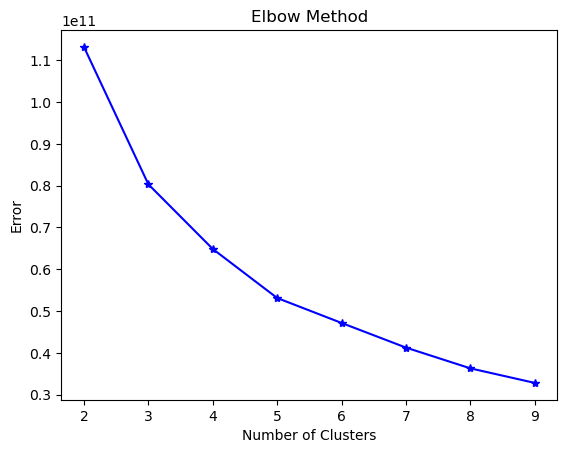

In [6]:
plt.plot(range(2,10), SumOfSquares(df), '-b*')

plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.title('Elbow Method')

#Plotting the results of the function 
#This helps to visually locate optimal cluster number...

Looking at the plot, the optimal number of clusters seems to be **5**

But, a KneeLocator function can be used for the same...

In [7]:
optimal_n = KneeLocator(range(2,10), SumOfSquares(df),
            curve = 'convex', direction = 'decreasing').elbow



optimal_n
#returns the elbow of the plot ( optimal cluster number )
#The point where reduction is error starts to even out...

/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

5

The function also returned the same...

/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

Text(0.5, 1.0, 'Elbow Method (Elbow Highlighted) ')

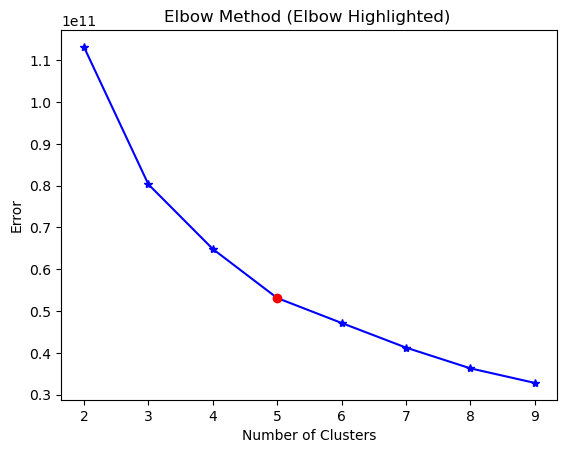

In [8]:
plt.plot(range(2,10), SumOfSquares(df), '-b*')
plt.plot(optimal_n,SumOfSquares(df)[optimal_n - 2], 'ro')

plt.xlabel('Number of Clusters')
plt.ylabel('Error')
plt.title('Elbow Method (Elbow Highlighted) ')

#highlighting the elbow...

**Therefore, the optimal number of clusters (K) is determined to be 5**

**PIPELINE**

In [9]:
name_of_model = ['Agglomerative Clustering', 'K-Means Clustering',
                'Birch', 'Spectral Clustering']

silh_scores = []
carh_scores = []
davb_scores = []


list_of_models = [
    AgglomerativeClustering( n_clusters = optimal_n, 
                            affinity = 'euclidean', linkage = 'ward'),
    KMeans(n_clusters = optimal_n, random_state = 99),
    Birch( n_clusters = optimal_n),
    SpectralClustering( n_clusters = optimal_n)
]


#list of model names..
#empty list to hold different error scores for each model...
#List of models

In [10]:
for i, clus in enumerate(list_of_models):
    
    pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('PCA', PCA(n_components = 2)),
        (name_of_model[i], clus)
    ]
    )
        
    pipe.fit(df)    
        
    clusters = pipe.fit_predict(df)
    
    silh_scores.append(silhouette_score( df, clusters, metric = 'euclidean'))
    
    carh_scores.append(calinski_harabasz_score( df, clusters))
    
    davb_scores.append(davies_bouldin_score( df, clusters))
    
    
    
#Creates a pipeline and iterates through different clustering models...

/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suduharidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._chec

In [11]:
evaluation_df = pd.DataFrame(zip(name_of_model, silh_scores,
                                carh_scores, davb_scores),
                            columns = ['Cluster Method',
                                      'Silhouette Score',
                                      'Carlinski Harabasz Score',
                                      'Davies Bouldin Score'])

evaluation_df

#create a dataframe of model names and error scores

,Cluster Method,Silhouette Score,Carlinski Harabasz Score,Davies Bouldin Score
0,Agglomerative Clustering,0.263052,120.466718,1.327535
1,K-Means Clustering,0.265716,124.652349,1.182208
2,Birch,0.458031,81.857507,1.244163
3,Spectral Clustering,0.529750,51.621763,1.023031


In [12]:
evaluation_df.sort_values(by = ['Silhouette Score',
                                'Carlinski Harabasz Score',
                                'Davies Bouldin Score'],
                         ascending = [False, False, True])


#sorts the dataframe to find best model...
#Silhouette Score - Higher is better
#Carlinski Harabasz Score - Higher is better
#Davies Bouldin Score - Lower is better

,Cluster Method,Silhouette Score,Carlinski Harabasz Score,Davies Bouldin Score
3,Spectral Clustering,0.529750,51.621763,1.023031
2,Birch,0.458031,81.857507,1.244163
1,K-Means Clustering,0.265716,124.652349,1.182208
0,Agglomerative Clustering,0.263052,120.466718,1.327535


The best model observed is **Spectral Clustering**

**BEST CLUSTER MODEL FOR PLOTTING**

In [13]:
pca_model = PCA(n_components = 2)

df_reduced = pca_model.fit_transform(df)

#create a PCA instance and reduce the dataframe to specified 2 components...

In [14]:
best_pipe = Pipeline(
    [
        ('Scaler', StandardScaler()),
        ('PCA', PCA(n_components = 2)),
        ('Spectral Clustering', SpectralClustering( n_clusters = optimal_n))
    ]
    )
best_pipe.fit(df)    

clusters_df = best_pipe.fit_predict(df)

#create a pipeline with best model recreation to gather cluster labels...

In [15]:
pca_df = pd.DataFrame(df_reduced, columns = ['Component_'+ str(i+1) for i in range(df_reduced.shape[1])])

pca_df['Cluster'] = clusters_df

#create a dataframe of components and add the obtained cluster labels to it..

In [16]:
pca_df.head()

#view the df

,Component_1,Component_2,Cluster
0,650.022120,1585.519107,0
1,-4426.804984,4042.451521,0
2,-4841.998710,2578.762188,0
3,990.346444,-6279.806002,0
4,10657.998731,-2159.725789,0


Text(0.5, 1.0, "Clusters obtained using 'PCA' ")

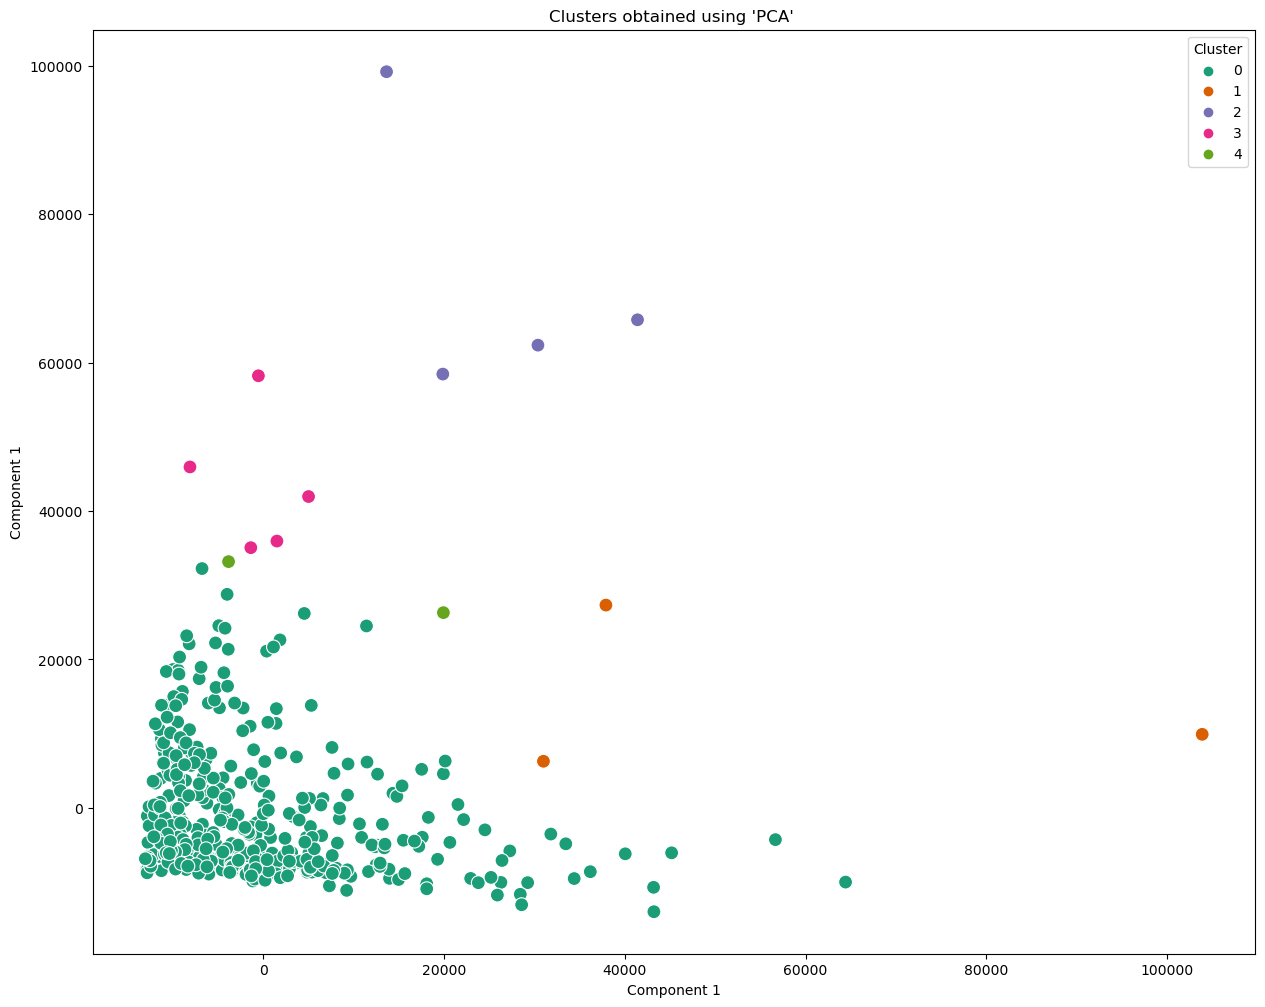

In [17]:
plt.figure(figsize = (15,12))
sns.scatterplot(data = pca_df, x = pca_df.Component_1, 
                y = pca_df.Component_2, hue = pca_df.Cluster,
               palette = 'Dark2', s = 100)
plt.xlabel('Component 1')
plt.ylabel('Component 1')
plt.title('Clusters obtained using \'PCA\' ')

#Plot the scatter of the 2 components with cluster label as hue...

**OPTIONAL**

In [18]:
df['cluster_label'] = clusters_df

#appending cluster labels to original df

In [19]:
cluster_means = []

for i in range(optimal_n):
    
    
       cluster_means.append(df[df.cluster_label == i].mean().values)
    
    
#create an array of mean of each column for each cluster...

In [20]:
cluster_means_df = pd.DataFrame(cluster_means, columns = df.columns)

#create a dataframe of cluster means...

In [21]:
cluster_means_df

#view the mean values to assess how clusters were formed...

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_label
0,1.307512,2.542254,11531.441315,4874.384977,6899.600939,2821.131455,2366.922535,1321.338028,0.0
1,1.000000,2.666667,60571.666667,30120.333333,17314.666667,38049.333333,2153.000000,20700.666667,1.0
2,2.000000,3.000000,29862.500000,53080.750000,60015.750000,3262.250000,27942.250000,3082.250000,2.0
3,2.000000,2.000000,7220.200000,20974.000000,43688.000000,2976.200000,23848.600000,3151.800000,3.0
4,2.000000,3.000000,15235.500000,33157.500000,24442.500000,3885.000000,11038.500000,8931.500000,4.0


CHANNEL 

    1 -> Horeca
    2 -> Retail

REGION

    1 -> Lisbon
    2 -> Oporto
    3 -> Other Region

**ASSUMPTIONS of HOW CLUSTERS ARE FORMED**

**CLUSTER 0**

    - This cluster consists of mostly Hotels/Restaurants and Cafes and some retail stores, outside the Lisbon 
    and Oporto region, that focuses more on fresh produce than other items...

**CLUSTER 1**

    - This cluster has Hotels/Restaurants and Cafes, mostly outside the Lisbon and Oporto region, which 
    translates to why every columns average annual spend is high except for detergents and paper....
    
**CLUSTER 2**

    - This cluster has Retail stores, maybe retail super stores because of the high annual spend on all 
    categories, that doesn't sell many delicacies...
    
**CLUSTER 3**

    - This cluster has Retail stores from the Oporto region, that do not purchase much fresh produce...
    
**CLUSTER 4**

    - This cluster has retail stores, outside the Lisbon and Oporto region, maybe medium size stores that also 
    tend to sell more delicacies than other retail stores...
    

**Apologies for the multiple warning messages professor.
Unable to update all packages or single packages... Anaconda not functioning properly.**